# Data cleaning, analysis and visualization

## Filtering pandas DataFrame based on specific conditions

Filtering rows based on a single condition:

In [ ]:
import pandas as pd

df = pd.read_csv("data_vis.csv")

In [ ]:
df

,Site,Location,Country,Year,VisitorCount
0,Great Wall of China,China,China,220 BC,5000000
1,Machu Picchu,Cusco Region,Peru,1450,2000000
2,Colosseum,Rome,Italy,80 AD,4000000
3,Taj Mahal,Agra,India,1648,6000000
4,Acropolis of Athens,Athens,Greece,5th century BC,3000000
5,Pyramids of Giza,Giza,Egypt,2580 BC,7000000
6,Angkor Wat,Siem Reap,Cambodia,12th century,1500000
7,Eiffel Tower,Paris,France,1889,7000000
8,Petra,Ma'an,Jordan,312 BC,2500000
9,Mesa Verde National Park,Colorado,United States,1906,1000000


# Handling dates

The function convert_year_to_int purpose is to clean the content of a DataFrame
with the "Year" column, by changing all textual references (such as AD, BD, century) with the corresponding years. It will use negative integers to represent dates BC and it will round the "century" to the earliest year of that century (i.e, 3rd century = 200). It changes the DataFrame according to the rules written above and returns None.

Arguments: df (pandas.DataFrame): a DataFrame containing the "Year" column.

In [ ]:
import pandas as pd

def convert_year_to_int(df):
    for index, row in df.iterrows(): # itering through the DataFrame
        year_str = str(row['Year']) # selecting the value of the column "Year"
        if 'century' in year_str: #checking whether "century" is in the str
            number, unit = year_str.split(" ", 1) #splits by
            # whitespace, we split only once because we want to separate the
            # numbers from the century and BC
            if 'century' in str(unit):
                century = int(number[:-2]) # we remove the "st", "nd" "rd", "th"
                if 'BC' in year_str: # we check whether it is BC
                    year_int = -century * 100 # we make the number negative and
                    # we multiply by 100 because it is a century
                else:
                    year_int = (century - 1) * 100 + 1 # if there is no BC it is
                    # AD, so we get the number -1 (as 3rd century starts with
                    # 200s) and we multiply it by 100
        else:
            if 'BC' in year_str: # if there is no century but just BC
                year_int = -int(year_str[:-3]) # We make it negative
            elif "AD" in year_str:
                year_int = int(year_str[:-3]) # We just take the AD out
            else:
                year_int = int(year_str) # if there is no AD or BC
        df.at[index, 'Year'] = year_int # we replace the value of that cell
        # found with the combination between column "Year" and the index of
        # iterrows, with the new year_int variable


## Test

In [ ]:
# Convert the "Year" column to integers
convert_year_to_int(df)

# look at the updated DataFrame
df

,Site,Location,Country,Year,VisitorCount
0,Great Wall of China,China,China,-220,5000000
1,Machu Picchu,Cusco Region,Peru,1450,2000000
2,Colosseum,Rome,Italy,80,4000000
3,Taj Mahal,Agra,India,1648,6000000
4,Acropolis of Athens,Athens,Greece,-500,3000000
5,Pyramids of Giza,Giza,Egypt,-2580,7000000
6,Angkor Wat,Siem Reap,Cambodia,1101,1500000
7,Eiffel Tower,Paris,France,1889,7000000
8,Petra,Ma'an,Jordan,-312,2500000
9,Mesa Verde National Park,Colorado,United States,1906,1000000


In [ ]:
# Filter rows where the VisitorCount is greater than 2 million
filtered_df = df[df['VisitorCount'] > 2000000]


In [ ]:
filtered_df

,Site,Location,Country,Year,VisitorCount
0,Great Wall of China,China,China,220 BC,5000000
2,Colosseum,Rome,Italy,80 AD,4000000
3,Taj Mahal,Agra,India,1648,6000000
4,Acropolis of Athens,Athens,Greece,5th century BC,3000000
5,Pyramids of Giza,Giza,Egypt,2580-2560 BC,7000000
7,Eiffel Tower,Paris,France,1889,7000000
8,Petra,Ma'an,Jordan,312 BC,2500000
10,Statue of Liberty,New York,United States,1886,4000000
12,Chichen Itza,Yucatan Peninsula,Mexico,600 AD,3000000
14,Alhambra,Granada,Spain,1238,3000000


Filtering rows based on multiple conditions

In [ ]:
# Filter rows where the Country is either 'China' or 'India'
filtered_df2 = df[(df['Country'] == 'China') | (df['Country'] == 'India')]

# Filter rows where the Year is after 1500 and the VisitorCount is less
# than 3 million
filtered_df3 = df[(df['Year'] > 1500) & (df['VisitorCount'] < 3000000)]


In [ ]:
filtered_df2

,Site,Location,Country,Year,VisitorCount
0,Great Wall of China,China,China,-220,5000000
3,Taj Mahal,Agra,India,1648,6000000
11,Potala Palace,Lhasa,China,601,1000000


In [ ]:
filtered_df3

,Site,Location,Country,Year,VisitorCount
9,Mesa Verde National Park,Colorado,United States,1906,1000000


Filtering rows based on string conditions

In [ ]:
# Filter rows where the Site name starts with 'Pyramids'
filtered_df4 = df[df['Site'].str.startswith('Pyramids')]

# Filter rows where the Location contains the word 'Rome'
filtered_df5 = df[df['Location'].str.contains('Rome')]


In [ ]:
filtered_df4

,Site,Location,Country,Year,VisitorCount
5,Pyramids of Giza,Giza,Egypt,-2580,7000000


In [ ]:
filtered_df5

,Site,Location,Country,Year,VisitorCount
2,Colosseum,Rome,Italy,80,4000000


Filtering rows based on regular expressions

In [ ]:
# Filter rows where the Site contains a pattern of text (lowercase or uppercase)
# then a whitespace, then "of", then another whitespace, and finally another
# pattern of text either uppercase or lowercase
filtered_df6 = df[df['Site'].str.contains(r'[A-Za-z]* of [A-Za-z]*')]

In [ ]:
filtered_df6

,Site,Location,Country,Year,VisitorCount
0,Great Wall of China,China,China,-220,5000000
4,Acropolis of Athens,Athens,Greece,-500,3000000
5,Pyramids of Giza,Giza,Egypt,-2580,7000000
10,Statue of Liberty,New York,United States,1886,4000000


Filtering  a DataFrame on the basis of NOT containing a certain string:

In the following example `~` operator (tilde) is used to negate the condition. The str.contains method is used on the 'Site' column to check if it contains the word 'Palace', and then the `~` operator is applied to invert the boolean values. The resulting boolean Series is used to filter the DataFrame, excluding the rows where the 'Site' column contains the word 'Palace'.
The filtered DataFrame will only include the rows where the 'Site' column does not contain the word 'Palace'.

You can modify the regular expression or pattern in the str.contains method to suit your specific filtering criteria.

In [ ]:
# Filter rows where the 'Site' column does not contain the word 'Palace'
filtered_df7 = df[~df['Site'].str.contains(r'Palace')]

In [ ]:
filtered_df7

,Site,Location,Country,Year,VisitorCount
0,Great Wall of China,China,China,-220,5000000
1,Machu Picchu,Cusco Region,Peru,1450,2000000
2,Colosseum,Rome,Italy,80,4000000
3,Taj Mahal,Agra,India,1648,6000000
4,Acropolis of Athens,Athens,Greece,-500,3000000
5,Pyramids of Giza,Giza,Egypt,-2580,7000000
6,Angkor Wat,Siem Reap,Cambodia,1101,1500000
7,Eiffel Tower,Paris,France,1889,7000000
8,Petra,Ma'an,Jordan,-312,2500000
9,Mesa Verde National Park,Colorado,United States,1906,1000000


# Data visualization in pandas and beyond

Data visualization is useful to understand patterns, trends and relationships
in the data, making it easier to communicate insights and make informed
decisions

We will see some libraries like: Pandas, Matplotlib, Seaborn, and Plotly for
data visualization

## Data vis in Pandas

###Basic Plots

* Bar plots: `df.plot.bar(x="Your dataframe column", y='Your dataframe column 2')` + more info
* Pie charts `df.plot.pie(y='Your dataframe column', labels=df["your dataframe column"], autopct='%.1f%%',figsize=(8, 8) or any figure size, title='Your title')`




## Bar Plots

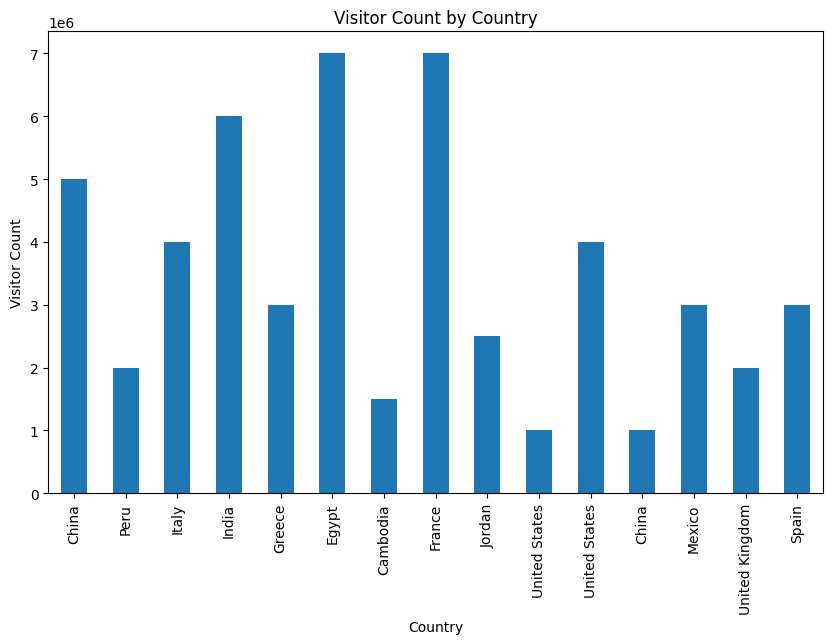

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar chart using pandas
ax = df.plot.bar(x='Country', y='VisitorCount', figsize=(10, 6), legend=None)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Visitor Count')
plt.title('Visitor Count by Country')

# Show the chart
plt.show()


In this example, we use the `plot.bar()` function on the DataFrame df and specify the x-axis column as 'Country' and the y-axis column as 'VisitorCount'. We also set the figure size using the figsize parameter and remove the legend by setting `legend=None`. Finally, we set the labels for the x-axis and y-axis using `xlabel()` and `ylabel()`, and provide a title using `title()`.

### Grouping together

We create another dataframe using the `groupby` method that we know, we use
`reset_index` to make sure that the grouped database has its own index and
finally we use `.sum()` to say to Python that we are summing the values of grouped elements

In [130]:
grouped = df.groupby(["Country"]).sum().reset_index()

<ipython-input-130-cab7c2daf0d6>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



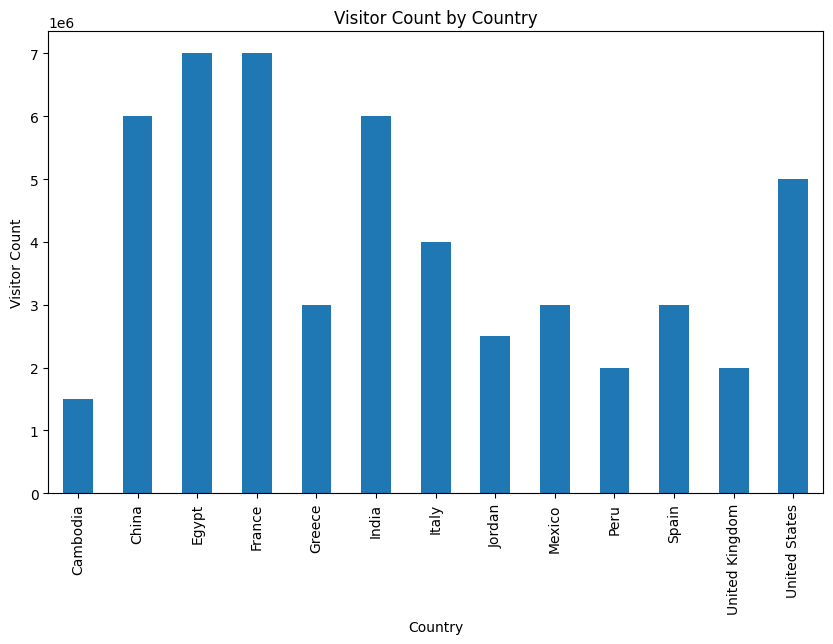

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar chart using pandas
ax = grouped.plot.bar(x='Country', y='VisitorCount', figsize=(10, 6), legend=None)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Visitor Count')
plt.title('Visitor Count by Country')

# Show the chart
plt.show()

### Sorting bars

We want to sort bars from the talles to the smallest to improve the readability of the graph, so we create a new dataframe with sorting the other one using the
`sort_values` method with the "VisitorCount" column selected as the to-be-sorted column and `ascending` set to False. Setting it to True would make the barchart from smallest to highest.

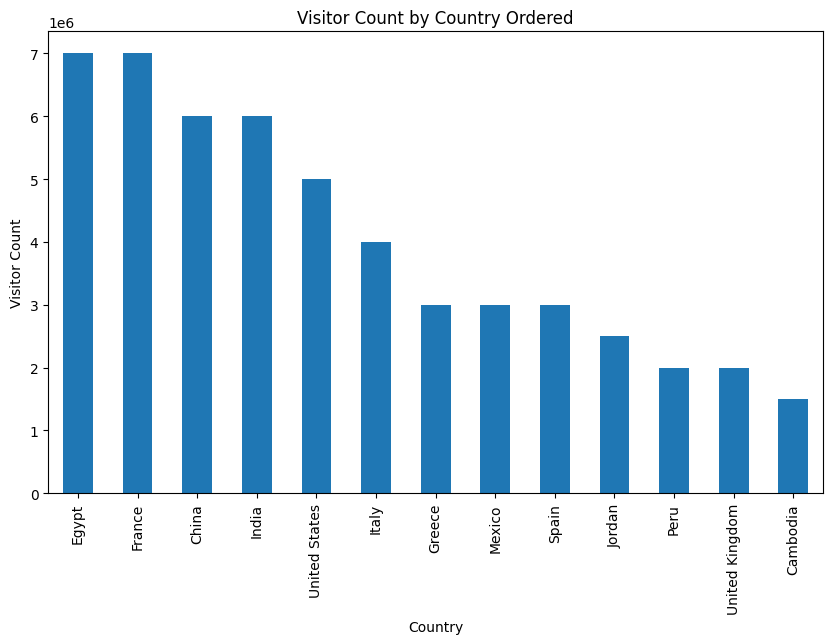

In [132]:
df_sorted = grouped.sort_values(by='VisitorCount', ascending=False)
ax = df_sorted.plot.bar(x='Country', y='VisitorCount', figsize=(10, 6), legend=None)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Visitor Count')
plt.title('Visitor Count by Country Ordered')

# Show the chart
plt.show()

### Pie Chart

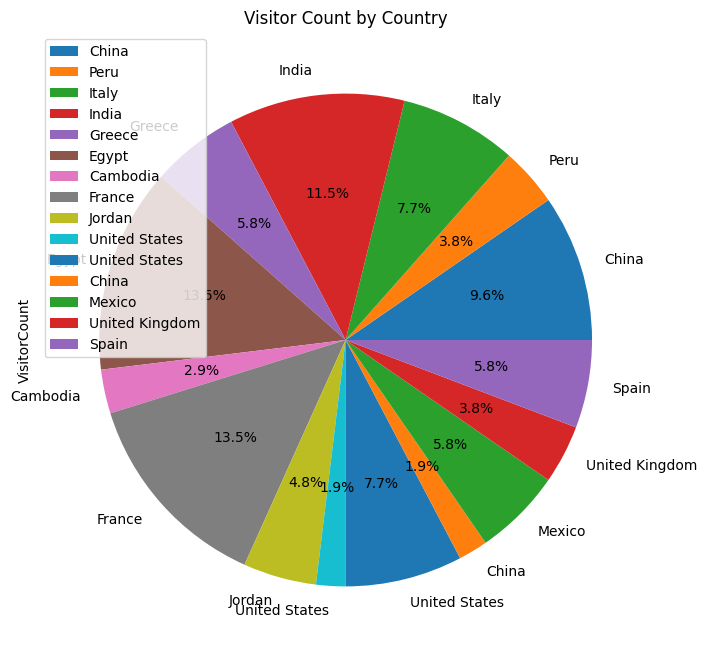

In [ ]:
import pandas as pd

# Create a pie chart using pandas
df.plot.pie(y='VisitorCount', labels=df['Country'], autopct='%.1f%%',
             figsize=(8, 8), title='Visitor Count by Country')

# Show the chart
plt.show()


In this example, we use the `plot.pie()` function on the DataFrame `df` and specify the column `'VisitorCount'` as the y-axis data. The `labels` parameter is set to the `'Country'` column, which will be used as the labels for each slice of the pie chart.

The `autopct` parameter is set to `'%.1f%%'`, which formats the percentage values shown on each slice with one decimal place.

We also specify the `figsize` parameter to set the size of the chart, and set the `title` parameter to provide a title for the chart.

Finally, we call `plt.show()` to display the pie chart.


### Adjusting Labels and legend

In the following example, after creating the pie chart, we store the returned `AxesSubplot` object in the variable `ax`. Then, we use the `legend` method of the `ax` object to manipulate the legend.

The `loc` parameter is set to `'center left'`, which specifies the position of the legend relative to the plot. The `bbox_to_anchor` parameter is set to `(1, 0.5)`, which places the legend at the right side of the plot, centered vertically.


By setting `rotatelabels=True` in the `plot.pie()` function, the labels in the pie chart will be rotated to avoid overlapping. Adjusting the angle of rotation can also be done by specifying the `rotatelabels` parameter with a desired angle in degrees.

Finally, we call `plt.show()` to display the pie chart with the legend moved to the side.





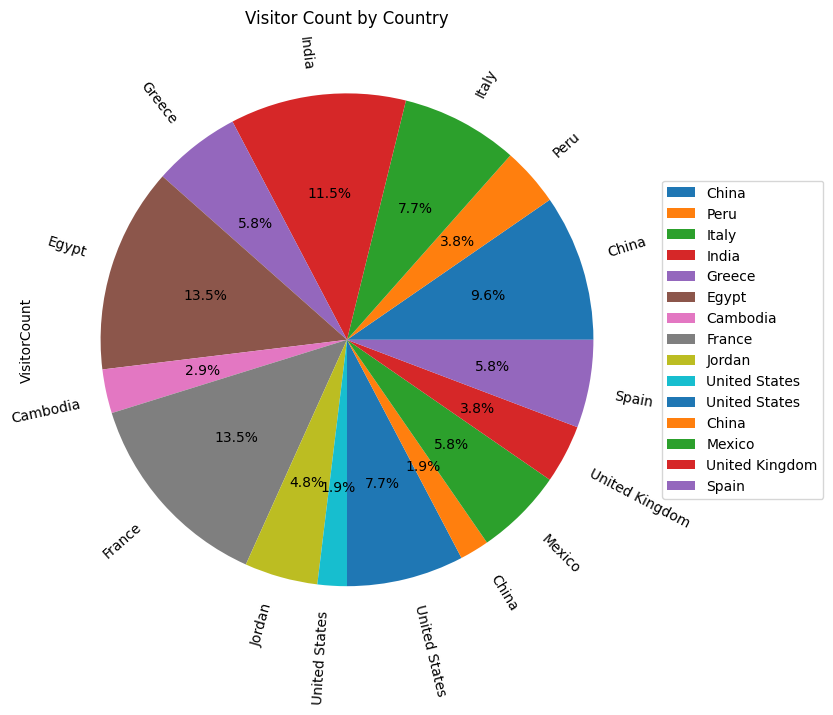

In [133]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a pie chart using pandas
ax = df.plot.pie(y='VisitorCount', labels=df['Country'], autopct='%.1f%%',
                 figsize=(8, 8), title='Visitor Count by Country',
                 rotatelabels=True)  # Rotate the labels

# Move the legend to the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the chart
plt.show()


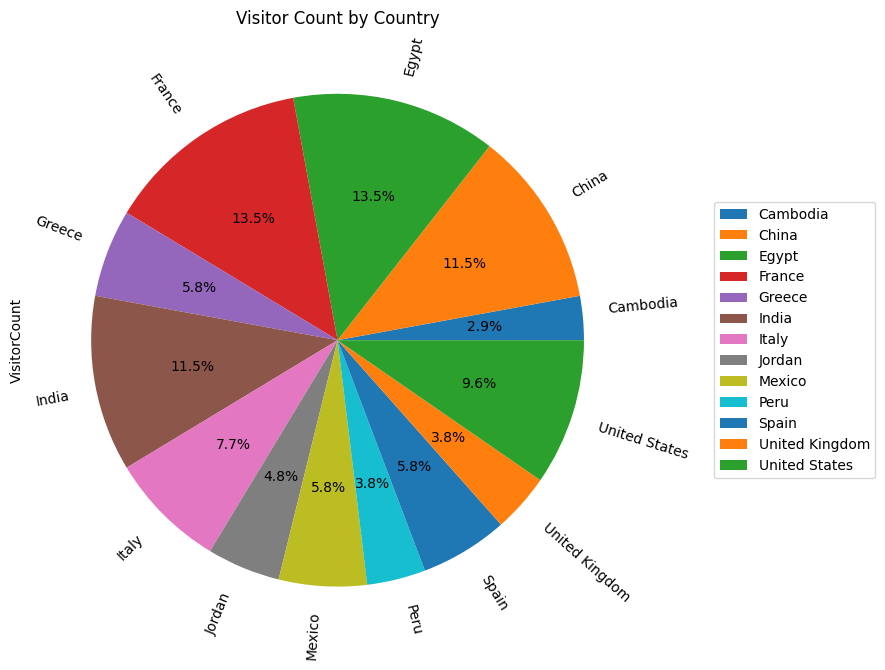

In [144]:
# do it with the grouped version

import pandas as pd
import matplotlib.pyplot as plt


# Create a pie chart using pandas
ax = grouped.plot.pie(y='VisitorCount', labels=grouped['Country'], autopct='%.1f%%',
                 figsize=(8, 8), title='Visitor Count by Country',
                 rotatelabels=True)  # Rotate the labels

# Move the legend to the side
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.savefig('pie.png', bbox_inches='tight') # saving a plot
# bbox_inces = "tight" ensures that the entire chart is saved without cropping

# Show the chart
plt.show()

[]

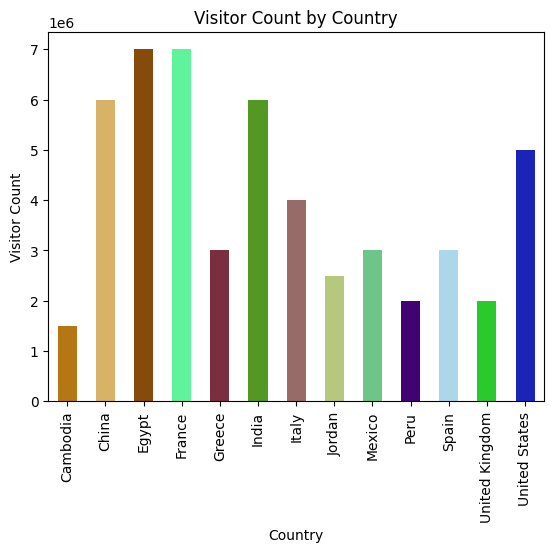

In [146]:
# Generate a random color for each category
import random
def generate_random_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

# Assign random colors to each category
colors = [generate_random_color() for _ in grouped["Country"]]

grouped.plot.bar(x='Country', y='VisitorCount', color = colors, legend=False)
plt.title('Visitor Count by Country')
plt.xlabel('Country')
plt.ylabel('Visitor Count')
plt.xticks(rotation=90)

plt.plot(legend=False)

Look at [pandas documentation](https://pandas.pydata.org/docs/user_guide/visualization.html) for more information on visualizations.



### Interactive Visualizations with plotly
**Plotly** is a powerful data visualization library for Python that provides interactive and customizable visualizations. It offers a wide range of chart types, including scatter plots, bar charts, pie charts, and more. With Plotly, you can create interactive plots, add annotations, hover tooltips, and export your visualizations to various file formats or embed them in web applications.

## Barchart

In the following example, `df` refers to your DataFrame containing the data. The `x` parameter specifies the column to use for the x-axis (in this case, "Country"), the `y` parameter specifies the column to use for the y-axis (in this case, "VisitorCount"), and the color parameter determines the color of each bar based on the "Country" column.

The `update_layout()` function is used to customize the layout of the chart, such as setting axis titles, enabling hovermode, and showing the legend.

Finally, `fig.show()` is used to display the interactive chart in a new browser window.

Note: Make sure you have the necessary libraries installed (e.g., plotly) and import the required modules before running the code.

In [147]:
import plotly.express as px

# Create a bar chart using Plotly
fig = px.bar(df, x='Country', y='VisitorCount', color='Country', title='Visitor Count by Country')

# Add interactive features
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Visitor Count',
    hovermode='closest',  # Display the nearest data point on hover
    showlegend=True,  # Show the legend
)

# Show the interactive chart
fig.show()



### Pie chart

In the following example, `df` refers to your DataFrame containing the data. The `values` parameter specifies the column to use for the values (in this case, "VisitorCount"), and the `names` parameter determines the labels for each slice based on the "Country" column.

The `update_traces()` function is used to customize the traces (slices) of the pie chart. In this case, we set `hoverinfo` to display the label and percentage on hover, and `textinfo` to display the value as the label. You can adjust these settings as per your preference.

Additionally, we use the hovertemplate parameter to define the template for the hover information. The `%{label}` placeholder is replaced with the label of the pie slice, `%{value}` is replaced with the corresponding value, and `%{percent:.1%}` is replaced with the percentage value rounded to one decimal place.

By setting the hovertemplate, you can display the label, value, and percentage when hovering over each slice of the pie chart.

Finally, `fig.show()` is used to display the interactive pie chart in a new browser window.

Remember to have the necessary libraries installed (e.g., plotly) and import the required modules before running the code.


In [152]:
import plotly.express as px

# Create a pie chart using Plotly
fig = px.pie(df, values='VisitorCount', names='Country', title='Visitor Count by Country')
# you can play with sizes using the width and height parameters


# Add interactive features
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Visitor Count: %{value}<br>Percentage: %{percent:.1%}',
    textinfo='value',  # Display the value as the label #use label, values, percent
    textfont_size=12,  # Set the font size of the labels
)

# Show the interactive chart
fig.show()

### Color Scales

Plotly provides a wide range of color scales that you can use for visualizations. Here are some of the commonly used color scales in Plotly:

1. `"Viridis"`: A perceptually uniform color scale with a smooth transition from yellow to green to blue, designed to be easily interpreted by viewers with color vision deficiencies.
2. `"Plasma"`: A color scale with a smooth transition from dark purple to light pink.
3. `"Inferno"`: A color scale with a smooth transition from black to yellow to red.
4. `"Magma"`: A color scale with a smooth transition from black to dark purple to bright yellow.
5. `"Cividis"`: A color scale designed to be perceptually uniform and accessible to viewers with color vision deficiencies.
6. `"Jet"`: A classic rainbow color scale that transitions through the colors of the rainbow.
7. `"Rainbow"`: Another rainbow color scale that transitions through the colors of the rainbow, but with a different color balance than "Jet".
8. `"Greys"`: A grayscale color scale ranging from white to black.
9. `"Blues"`: A color scale ranging from light blue to dark blue.
10. `"Reds"`: A color scale ranging from light red to dark red.

These are just a few examples, and Plotly provides many more color scales to choose from. You can explore the complete list of available color scales in Plotly's official documentation: [https://plotly.com/python/builtin-colorscales/](https://plotly.com/python/builtin-colorscales/)

When using Plotly Express or other Plotly functions, you can specify the desired color scale by providing the corresponding name as the `color_continuous_scale` parameter value.


In [153]:
import plotly.express as px

# Create a bar chart using Plotly
fig = px.bar(df, x='Country', y='VisitorCount', color='VisitorCount', title='Visitor Count by Country', color_continuous_scale='Magma')

# Add interactive features
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Visitor Count',
    hovermode='closest',  # Display the nearest data point on hover
    showlegend=True,  # Show the legend
)

# Show the interactive chart
fig.show()


In [154]:
import pandas as pd
import plotly.express as px

# Group by 'Country' and sum the 'VisitorCount' values
df_sum = df.groupby('Country')['VisitorCount'].sum().reset_index()
# we group by again
# Create a bar chart using Plotly Express
fig = px.bar(df_sum, x='Country', y='VisitorCount', color='VisitorCount',
             title='Total Visitor Count by Country', color_continuous_scale="Rainbow")

# Show the chart
fig.show()


In [155]:
import plotly.express as px

# Create a sunburst chart with gradient colors
fig = px.sunburst(df, path=['Country'], values='VisitorCount', title='Visitor Count by Country',
                  color='VisitorCount', color_continuous_scale='Viridis')

# Add interactive features
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Count: %{value}',  # Custom hover template
)

# Show the interactive chart
fig.show()

In this example, we are using the `px.sunburst()` function instead of `px.pie()` to create the chart (As pies do not allow color scales). The path parameter is set to ['Country'] to create a single-level sunburst chart. The color parameter is set to "VisitorCount", mapping the color of each segment based on the corresponding value in the "VisitorCount" column. The color_continuous_scale parameter is set to "Viridis", which provides a gradient-like color mapping.

### Saving Graph as Image in plotly

To save a graph in Plotly, you can use the `write_image()` function from the `plotly.io` module. This function allows you to save the graph in various file formats. Here's an example of how you can save a graph in PNG format:

```python
import plotly.graph_objects as go
import plotly.io as pio

# Create a Plotly figure
fig = go.Figure(data=[go.Bar(x=[1, 2, 3], y=[4, 5, 6])])

# Save the graph as a PNG file
pio.write_image(fig, 'graph.png', format='png')
```

In the example above, the `write_image()` function is used to save the `fig` object as a PNG file with the filename 'graph.png'. You can specify different file formats by changing the `format` parameter. Some of the supported file formats include:

- PNG (`'png'`)
- JPEG (`'jpeg'` or `'jpg'`)
- SVG (`'svg'`)
- PDF (`'pdf'`)
- WebP (`'webp'`)
- GIF (`'gif'`)

You can choose the appropriate file format based on your requirements. The saved image will be stored in the specified file location with the chosen format.

### Saving Graph as HTML in plotly (to keep the interactive functions)

To save a graph in Plotly as an HTML file, you can use the `write_html()` function from the `plotly.io` module. This function allows you to save the graph as an interactive HTML file that can be opened in a web browser. Here's an example:

```python
import plotly.graph_objects as go
import plotly.io as pio

# Create a Plotly figure
fig = go.Figure(data=[go.Bar(x=[1, 2, 3], y=[4, 5, 6])])

# Save the graph as an HTML file
pio.write_html(fig, 'graph.html')
```

In the example above, the `write_html()` function is used to save the `fig` object as an HTML file with the filename 'graph.html'. The resulting HTML file will contain the interactive plot that can be opened in a web browser.

In [156]:
# Try to save the plots we have created before!

### Exercise:

Given this dataset:

```csv
Artifact ID,Artifact Name,Category,Origin,Year,Location,Rating,Shares_in_Social_Media
1,Sculpture A,Sculpture,China,200 BC,China,80,5000
2,Painting A,Painting,Italy,1600,Italy,90,8000
3,Sculpture B,Sculpture,China,500 BC,China,70,3000
4,Sculpture C,Sculpture,China,100 AD,China,85,6000
5,Painting B,Painting,United States,1900,United States,75,4000
```

Make some data visualization using pandas and plotly by exploiting possible groupings for "Category" and "Origin" and numerical values such as "Rating" and "Shares_in_Social_Media".

For plotly try to use the color scales, and adjust the graphs if there are some visualization problems.

Document each graph you make by commenting the code.
